In [52]:
import pandas as pd
import os
from tqdm import tqdm
from scipy.io import savemat, loadmat
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib import cm
from sklearn.cluster import DBSCAN

import numpy as np

In [41]:
processedDataFolder_name = "./processedData/2025-02-11_22-23-15/"
model_path = processedDataFolder_name + 'dronetrained/checkpoints/2025-02-11T19:41:01.537741/MMNet_ChBest.pt'#'./trained/MMNet_ChBest.pt'
resultMatFolderPath = processedDataFolder_name + "outputDroneAll/"

In [42]:
mergedRadarDepthRgbPred = processedDataFolder_name + "mergedRadarDepthRgbPred.pkl" 
mergedRadarDepthRgbPred = pd.read_pickle(mergedRadarDepthRgbPred)
mergedRadarDepthRgbPred.reset_index(drop=True, inplace=True)


In [43]:
mergedRadarDepthRgbPred.columns

Index(['datetime', 'radarPCD', 'doppler', 'snr', 'range', 'angle', 'power',
       'depthPCD', 'rgbImage', 'rgbFilename', 'rgbFilepath', 'predPCD'],
      dtype='object')

In [5]:
all_files = os.listdir(resultMatFolderPath)
folder_path = processedDataFolder_name + "visualization/testResultPowerAll"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")




Folder './processedData/2025-02-11_22-23-15/visualization/testResultPowerAll' already exists.


In [ ]:
for index, row in tqdm(mergedRadarDepthRgbPred.iterrows(), total=len(mergedRadarDepthRgbPred), desc="Processing frames"):
    mergedRadarDepthRgbPred['datetime'] = pd.to_datetime(mergedRadarDepthRgbPred['datetime'])
    frameIDX = index
    # print(frameIDX)
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(20,7))
    fig.suptitle(f"Point Cloud Visualization: {mergedRadarDepthRgbPred['datetime'][frameIDX]}", fontsize=7, fontweight='bold')  # Main title

    ax1 = fig.add_subplot(141,projection='3d')
    power_values = np.array(mergedRadarDepthRgbPred["power"][frameIDX])  
    img1 = ax1.scatter(mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 2], c=mergedRadarDepthRgbPred["power"][frameIDX],cmap = 'viridis', s=1)
    fig.colorbar(img1)
    ax1.set_title('Radar PCD')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    ax2 = fig.add_subplot(142,projection='3d')
    img2 = ax2.scatter(mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 2], c=mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 2], cmap = 'viridis',s=1)
    fig.colorbar(img2)
    ax2.set_title('Depth Camera PCD')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    ax3 = fig.add_subplot(143,projection='3d')
    img3 = ax3.scatter(mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 2], c=mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 2],cmap = 'viridis',s=1)
    fig.colorbar(img3)
    ax3.set_title('Predicted PCD')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')

    ax4 = fig.add_subplot(144)
    img4 = Image.open(mergedRadarDepthRgbPred["rgbFilepath"][frameIDX])
    ax4.imshow(img4)  
    ax4.set_title("RGB Image")
    ax4.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    figName = mergedRadarDepthRgbPred["datetime"][frameIDX]
    plt.savefig(f"{folder_path}/{figName}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close(fig)
            

Processing frames:  30%|██▉       | 43/144 [06:47<15:55,  9.46s/it]

Processing frames:   0%|          | 0/144 [00:00<?, ?it/s]

/tmp/ipykernel_1515792/1352149756.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  img2 = ax2.scatter(mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 2], cmap = 'viridis',s=1)
/tmp/ipykernel_1515792/1352149756.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  img3 = ax3.scatter(mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 2], cmap = 'viridis',s=1)
Processing frames:   1%|          | 1/144 [00:17<41:54, 17.59s/it]/tmp/ipykernel_1515792/1352149756.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  img2 = ax2.scatter(mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 1], mergedRadarDe

KeyboardInterrupt: 

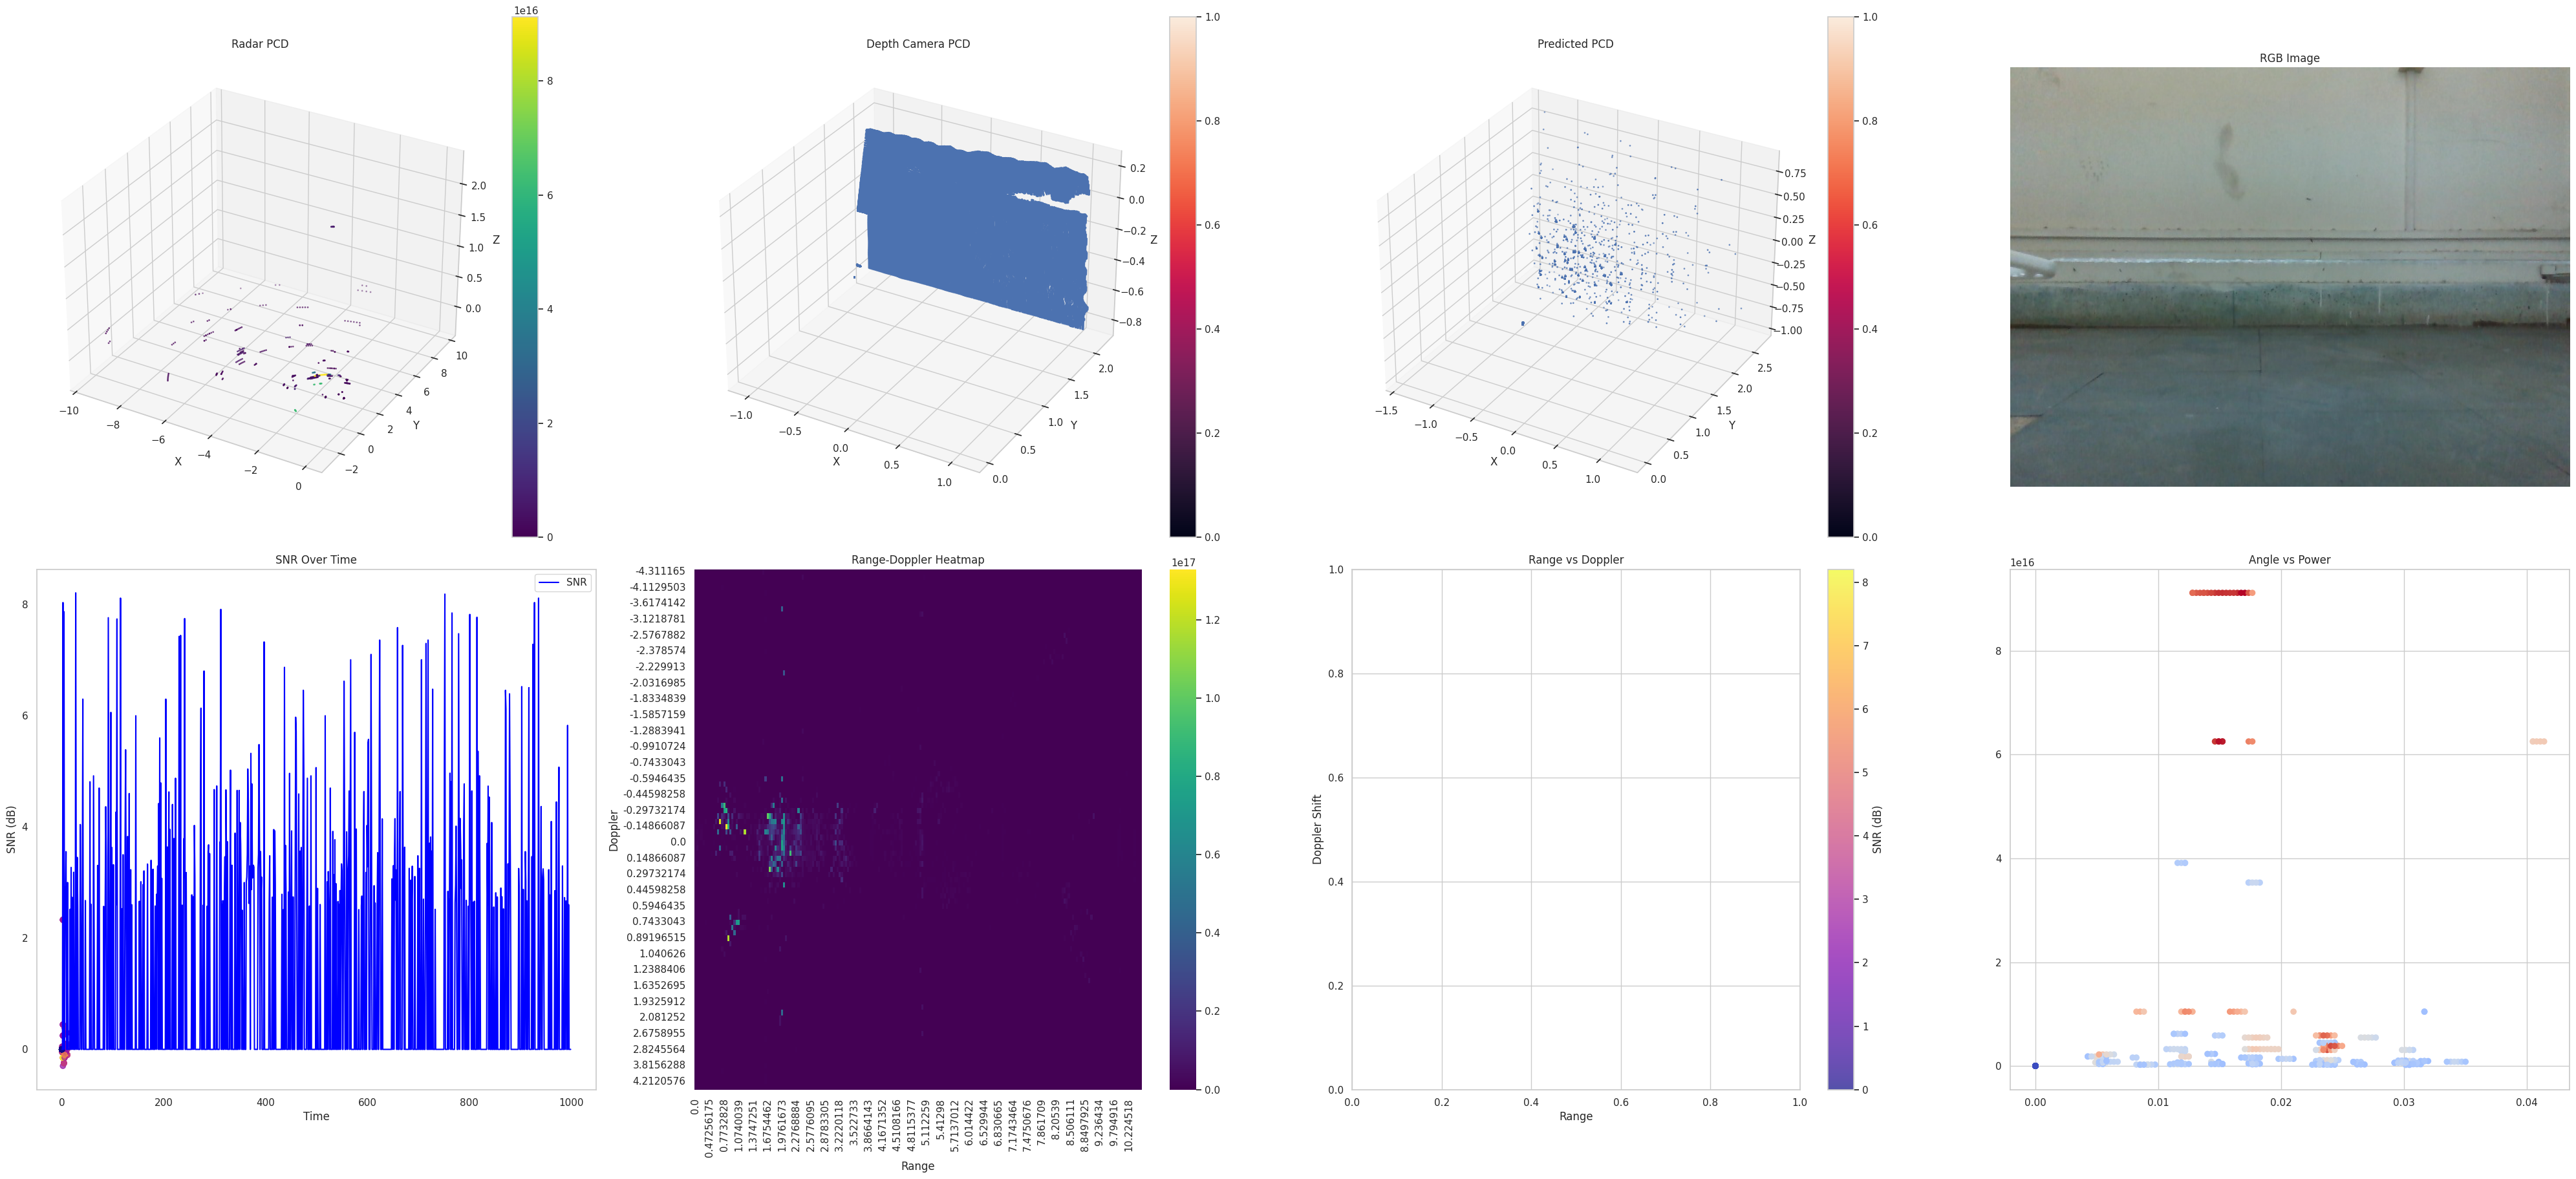

In [45]:
for index, row in tqdm(mergedRadarDepthRgbPred.iterrows(), total=len(mergedRadarDepthRgbPred), desc="Processing frames"):
    mergedRadarDepthRgbPred['datetime'] = pd.to_datetime(mergedRadarDepthRgbPred['datetime'])
    frameIDX = index
    # print(frameIDX)
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(40,20))
    ax1 = fig.add_subplot(241,projection='3d')
    power_values = np.array(mergedRadarDepthRgbPred["power"][frameIDX])  
    img1 = ax1.scatter(mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["radarPCD"][frameIDX][:, 2], c=mergedRadarDepthRgbPred["power"][frameIDX],cmap = 'viridis', s=1)
    fig.colorbar(img1)
    ax1.set_title('Radar PCD')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    ax2 = fig.add_subplot(242,projection='3d')
    img2 = ax2.scatter(mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["depthPCD"][frameIDX][:, 2], cmap = 'viridis',s=1)
    fig.colorbar(img2)
    ax2.set_title('Depth Camera PCD')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    ax3 = fig.add_subplot(243,projection='3d')
    img3 = ax3.scatter(mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 0], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 1], mergedRadarDepthRgbPred["predPCD"][frameIDX][:, 2], cmap = 'viridis',s=1)
    fig.colorbar(img3)
    ax3.set_title('Predicted PCD')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')

    ax4 = fig.add_subplot(244)
    img4 = Image.open(mergedRadarDepthRgbPred["rgbFilepath"][frameIDX])
    ax4.imshow(img4)  
    ax4.set_title("RGB Image")
    ax4.axis("off")

    ax5 = fig.add_subplot(245)
    x_values = np.arange(len(mergedRadarDepthRgbPred['snr'][frameIDX])) 
    ax5.plot(x_values, mergedRadarDepthRgbPred['snr'][frameIDX], label="SNR", color="blue")
    ax5.set_xlabel("Time")
    ax5.set_ylabel("SNR (dB)")
    ax5.set_title("SNR Over Time")
    ax5.legend()
    ax5.grid()  

    ax6 = fig.add_subplot(246)
    df_expanded = mergedRadarDepthRgbPred.explode(["doppler", "range", "power"])
    heatmap_data = df_expanded.pivot_table(index="doppler", columns="range", values="power", aggfunc='mean')
    # heatmap_data = mergedRadarDepthRgbPred.pivot_table(index="doppler", columns="range", values="power", aggfunc='mean')
    heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')
    heatmap_data = heatmap_data.fillna(0)
    sns.heatmap(heatmap_data, cmap="viridis", ax=ax6)
    ax6.set_xlabel("Range")
    ax6.set_ylabel("Doppler")
    ax6.set_title("Range-Doppler Heatmap")


    ax7 = fig.add_subplot(247)
    sc = ax5.scatter(mergedRadarDepthRgbPred['range'][frameIDX], mergedRadarDepthRgbPred['doppler'][frameIDX], c=mergedRadarDepthRgbPred['snr'][frameIDX], cmap='plasma', alpha=0.7)
    fig.colorbar(sc, ax=ax7, label="SNR (dB)")
    ax7.set_xlabel("Range")
    ax7.set_ylabel("Doppler Shift")
    ax7.set_title("Range vs Doppler")

    ax8 = fig.add_subplot(248)
    angles = np.radians(mergedRadarDepthRgbPred['angle'][frameIDX])  
    ax8.scatter(angles, mergedRadarDepthRgbPred['power'][frameIDX], c=mergedRadarDepthRgbPred['snr'][frameIDX], cmap="coolwarm")
    ax8.set_title("Angle vs Power")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    figName = mergedRadarDepthRgbPred["datetime"][frameIDX]
    plt.savefig(f"{folder_path}/{figName}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close(fig)
            

In [14]:
print(len(mergedRadarDepthRgbPred["power"][0]))
print(len(mergedRadarDepthRgbPred["radarPCD"][0]))

1000
1000


In [36]:
print(mergedRadarDepthRgbPred[['doppler', 'range', 'power']].applymap(type).head())


                   doppler                    range                    power
0  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>
1  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>
2  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>
3  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>
4  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>  <class 'numpy.ndarray'>


In [38]:
print(heatmap_data.dtypes)
print(heatmap_data.head())

range
0.000000     object
0.171841     object
0.214801     object
0.257761     object
0.300721     object
              ...  
10.353398    object
10.396358    object
10.611159    object
10.740040    object
10.783000    object
Length: 217, dtype: object
range     0.000000  0.171841  0.214801  0.257761  0.300721  0.343681   \
doppler                                                                 
-4.311165       NaN       NaN       NaN       NaN       NaN       NaN   
-4.261611       NaN       NaN       NaN       NaN       NaN       NaN   
-4.212058       NaN       NaN       NaN       NaN       NaN       NaN   
-4.112950       NaN       NaN       NaN       NaN       NaN       NaN   
-3.964290       NaN       NaN       NaN       NaN       NaN       NaN   

range     0.386641  0.472562  0.515522  0.558482   ... 10.052677 10.138597  \
doppler                                            ...                       
-4.311165       NaN       NaN       NaN       NaN  ...       NaN       NaN   
-

In [24]:
print(type(mergedRadarDepthRgbPred['snr']))  
print(len(mergedRadarDepthRgbPred['snr']))  
print(type(mergedRadarDepthRgbPred['snr'][0]))  
print(np.shape(mergedRadarDepthRgbPred['snr']))  


<class 'pandas.core.series.Series'>
144
<class 'numpy.ndarray'>
(144,)


In [27]:
print(len(mergedRadarDepthRgbPred['datetime']), len(mergedRadarDepthRgbPred['snr']))


144 144


In [36]:
mat_files = [file for file in all_files if file.endswith('.mat')]
progressBar = tqdm(mat_files, desc="Plotting .mat files")
for mat_file in progressBar:
    progressBar.set_postfix(file=mat_file)
    file_path = os.path.join(resultMatFolderPath, mat_file)
    mat_data = scipy.io.loadmat(file_path)
    # print(f"Loaded {mat_file}")
    # print("Keys in the .mat file:", mat_data.keys())
    # for columns in header:
        # data = mat_data[columns]
        # print(f"Shape of the {columns}:", data.shape)

    header = ['input', 'pred_pcd', 'gt_pcd', 'Chd', 'EMD']

    input_points = mat_data['input']
    pred_points = mat_data['pred_pcd']
    gt_points = mat_data['gt_pcd']
    fig = plt.figure(figsize=(20, 7))
    fig.suptitle(f"Point Cloud Visualization: {mat_file}", fontsize=7, fontweight='bold')  # Main title

    ax1 = fig.add_subplot(141, projection='3d')
    scatter1 = ax1.scatter(input_points[:, 0], input_points[:, 1], input_points[:, 2], 
                        c=, cmap='viridis', s=1)
    ax1.set_title("Input Point Cloud")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    ax2 = fig.add_subplot(142, projection='3d')
    scatter2 = ax2.scatter(pred_points[:, 0], pred_points[:, 1], pred_points[:, 2], 
                        c=pred_points[:, 2], cmap='viridis', s=1)
    ax2.set_title("Predicted Point Cloud")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax3 = fig.add_subplot(143, projection='3d')
    scatter3 = ax3.scatter(gt_points[:, 0], gt_points[:, 1], gt_points[:, 2], 
                        c=gt_points[:, 2], cmap='viridis', s=1)
    ax3.set_title("Ground Truth Point Cloud")
    ax3.set_xlabel("X")
    ax3.set_ylabel("Y")
    ax3.set_zlabel("Z")

    ax4 = fig.add_subplot(144)


    timestampStr = mat_file.split("_")[0]

    # timestampStr = datetime.strptime(timestampStr, "%Y-%m-%d %H:%M:%S.%f")
    # rgbFileNa = timestampStr.strftime("%Y-%m-%d %H:%M:%S.%f") + ".jpg"
    # print(rgbFileNa)

    rgbFilePt = mergedRadarDepthRgbPred.loc[mergedRadarDepthRgbPred['datetime'] == timestampStr, 'rgbFilepath']
    # print(f"{mat_file} {timestampStr} {rgbFilePt}" )
    if not rgbFilePt.empty:
        rgbFilePt = rgbFilePt.iloc[0] 
    else:
        rgbFilePt = None
    
    img = Image.open(rgbFilePt)

    ax4.imshow(img)  
    ax4.set_title("RGB Image")
    ax4.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.savefig(f"{folder_path}/{mat_file}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close(fig)

Plotting .mat files:   0%|          | 0/144 [00:09<?, ?it/s]


In [53]:


def calculate_centroids(data, labels):
    unique_labels = np.unique(labels)
    centroids = []

    for label in unique_labels:
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append((label, centroid))
    return centroids

def find_closest_centroid(previous_centroids, current_centroids, id_mapping, next_id, frame_counts, frame_threshold=20):
    new_centroids = []
    for curr_label, curr_centroid in current_centroids:
        min_distance = float('inf')
        closest_centroid = None
        closest_prev_label = None

        for prev_label, prev_centroid in previous_centroids:
            distance = np.linalg.norm(curr_centroid - prev_centroid)
            if distance < min_distance:
                min_distance = distance
                closest_centroid = curr_centroid
                closest_prev_label = prev_label

        if closest_prev_label is not None and min_distance < 0.5:  # Threshold distance
            # Use existing ID if close to a previous centroid, initializing if necessary
            centroid_id = id_mapping.get(closest_prev_label, next_id)
            if closest_prev_label not in id_mapping:
                id_mapping[closest_prev_label] = centroid_id
                frame_counts[centroid_id] = 0  # Initialize frame count if first occurrence
            frame_counts[centroid_id] += 1  # Increment frame count
        else:
            # Assign a new ID if no close match found
            centroid_id = next_id
            id_mapping[curr_label] = centroid_id
            frame_counts[centroid_id] = 1  # Initialize frame count
            next_id += 1

        # Store the ID in the mapping and in the new_centroids list
        new_centroids.append((centroid_id, curr_centroid))

    # Filter centroids based on frame threshold
    valid_centroids = [(cid, c) for cid, c in new_centroids if frame_counts[cid] >= frame_threshold]
    return valid_centroids, next_id


In [55]:
previous_centroids = []
id_mapping = {}
frame_counts = {}
next_id = 0

In [82]:
folder_path = processedDataFolder_name + "visualization/dbScanResult"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './processedData/2025-02-11_22-23-15/visualization/dbScanResult' created.


In [87]:
cmap = cm.get_cmap("tab20", 20)

for index,row in mergedRadarDepthRgbPred.iterrows():
    # print(index)

    colors = mergedRadarDepthRgbPred["doppler"][index]
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121,projection='3d')
    img1 = ax1.scatter(mergedRadarDepthRgbPred["radarPCD"][index][:, 0], mergedRadarDepthRgbPred["radarPCD"][index][:, 1], mergedRadarDepthRgbPred["radarPCD"][index][:, 2], c=mergedRadarDepthRgbPred["power"][index],cmap = 'viridis', s=1)
    fig.colorbar(img1)
    ax1.set_title('Radar PCD')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_xlim(-7, 9)
    ax1.set_ylim(-5, 6)
    ax1.set_zlim(-1, 3)

    clustering = DBSCAN(eps=.8, min_samples=2).fit(mergedRadarDepthRgbPred["radarPCD"][index])
    cluster_labels = np.array(clustering.labels_)
    current_centroids = calculate_centroids(mergedRadarDepthRgbPred["radarPCD"][index], cluster_labels)

    print(len(current_centroids))
    # Get the closest centroids and assign consistent IDs, keeping only valid ones
    valid_centroids, next_id = find_closest_centroid(previous_centroids, current_centroids, id_mapping, next_id, frame_counts, frame_threshold=10)
    previous_centroids = current_centroids  # Update previous centroids for next frame
    for centroid_id, centroid in valid_centroids:
        color = cmap(centroid_id % 20)  # Assign unique color based on ID
        ax1.scatter(centroid[0], centroid[1], centroid[2], marker='o', s=100, color=color, label=f'Cluster ID {centroid_id}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{folder_path}/{index}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()
    # break

/tmp/ipykernel_1047554/1499046609.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20", 20)


19
16
16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


23
22
22
21
21
22
22
20
19
22
21
18
20
21
20
18
21
19
20
22
26
19
21
21
20
19
20
20
20
20
17
17
20
16
19
16
19
17
17
17
15
14
17
19
19
20
20
23
21
20
20
19
22
21
19
19
19
15
13
14
15
13
15
15
15
16
18
16
15
13
15
14
14
13
14
14
15
16
15
14
13
15
16
17
19
16
17
14
13
14
15
15
12
13
15
14
14
14
14
12
14
14
13
13
14
12
14
14
14
13
14
13
13
12
13
13
15
14
14
14
15
16
16
16
12
14
14
12
12
11
11
16
15
14
13
13
13
11
12
14
13


In [ ]:
from PIL import Image
import os

# Path to the folder containing images
output_gif = processedDataFolder_name + "dbscan46FrameFixedAxis.gif"

# Get list of image files (sorted by filename)
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Load images
images = [Image.open(os.path.join(folder_path, img)) for img in image_files]
images = images[-46:]
# Save as GIF
images[0].save(
    output_gif,
    save_all=True,
    append_images=images[1:],  # Append the rest of the images
    duration=.001,  # Duration per frame in milliseconds (adjust as needed)
    loop=0  # Loop indefinitely
)

print(f"GIF saved as {output_gif}")

GIF saved as ./processedData/2025-02-11_22-23-15/dbscan46Frame.gif
